# Linear Regression - WHO Life Expectancy

## About the dataset
Author of the dataset: Lasha Gochiashvili. (2023). <i>Life Expectancy (WHO) Fixed</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/3065197 \
Data contains life expectancy, health, immunization, and economic and demographic information about 179 countries from 2000-2015 years. The adjusted dataset has 21 variables and 2.864 rows.

## Aim of the analysis
By using multiple linear regression model, the analysis looks into the relationship between life expectancy and various predicting factors in the dataset. The analysis aims to answer the following key questions:

- What kind of correlations do the predicting factors have with life expectancy? Are these correlations linear?
- Do these correlations differ when comparing developed and developing nations?
- Is multiple linear regression model an optimal and accurate tool for creating life expectancy predictions from the data? 

## 1. Extract the data
Import the dataset and the required libraries

In [257]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [258]:
df = pd.read_csv('Life-Expectancy-Data.csv', sep=",")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [260]:
#check the number of missing values
nan_count = df.isna().sum().sum()
print('Number of missing values:', nan_count)

Number of missing values: 0


In [261]:
#check the number of duplicates
dups = df.duplicated()
dups.sum()

0

In [262]:
#drop unnecessary columns: Country, Year, Status, Adult Mortality, infant deaths, under-five deaths
df.drop(df.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True)
df.head()

,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [263]:
#split the data into developed and developing countries
df_developed = df[df['Economy_status_Developed'] == 1]
df_developed.drop(df_developed.columns[[12, 13]], axis=1, inplace=True)

#change data types as float for linear regression
df_developed = df_developed.astype(float)

df_developed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 2863
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Alcohol_consumption          592 non-null    float64
 1   Hepatitis_B                  592 non-null    float64
 2   Measles                      592 non-null    float64
 3   BMI                          592 non-null    float64
 4   Polio                        592 non-null    float64
 5   Diphtheria                   592 non-null    float64
 6   Incidents_HIV                592 non-null    float64
 7   GDP_per_capita               592 non-null    float64
 8   Population_mln               592 non-null    float64
 9   Thinness_ten_nineteen_years  592 non-null    float64
 10  Thinness_five_nine_years     592 non-null    float64
 11  Schooling                    592 non-null    float64
 12  Life_expectancy              592 non-null    float64
dtypes: float64(13)
memory us

In [264]:
df_developing = df[df['Economy_status_Developing'] == 1]
df_developing.drop(df_developing.columns[[12, 13]], axis=1, inplace=True)

df_developing = df_developing.astype(float)
df_developing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2272 entries, 0 to 2861
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Alcohol_consumption          2272 non-null   float64
 1   Hepatitis_B                  2272 non-null   float64
 2   Measles                      2272 non-null   float64
 3   BMI                          2272 non-null   float64
 4   Polio                        2272 non-null   float64
 5   Diphtheria                   2272 non-null   float64
 6   Incidents_HIV                2272 non-null   float64
 7   GDP_per_capita               2272 non-null   float64
 8   Population_mln               2272 non-null   float64
 9   Thinness_ten_nineteen_years  2272 non-null   float64
 10  Thinness_five_nine_years     2272 non-null   float64
 11  Schooling                    2272 non-null   float64
 12  Life_expectancy              2272 non-null   float64
dtypes: float64(13)
memory u

In [265]:
df_developed.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol_consumption,592.0,10.049358,2.497904,2.30,8.5825,10.215,11.5725,17.87
Hepatitis_B,592.0,87.849662,14.528671,14.00,88.0000,91.000,96.0000,99.00
Measles,592.0,88.261824,10.046796,31.00,86.0000,91.000,95.0000,99.00
BMI,592.0,26.078378,0.927985,22.50,25.6000,26.100,26.7000,28.80
Polio,592.0,94.866554,4.022453,71.00,93.0000,96.000,98.0000,99.00
Diphtheria,592.0,95.077703,3.823170,72.00,93.0000,96.000,98.0000,99.00
Incidents_HIV,592.0,0.075051,0.043548,0.01,0.0400,0.080,0.0800,0.29
GDP_per_capita,592.0,33683.547297,21321.497749,3718.00,16465.0000,33545.000,44403.2500,112418.00
Population_mln,592.0,27.238514,53.333421,0.28,4.2775,8.330,22.5125,320.74
Thinness_ten_nineteen_years,592.0,1.248649,0.729646,0.30,0.7000,1.000,1.8000,4.00


In [266]:
df_developing.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol_consumption,2272.0,3.458532,3.063084,0.00,0.7675,2.750,5.6225,14.58
Hepatitis_B,2272.0,83.365757,16.231551,12.00,75.0000,89.000,96.0000,99.00
Measles,2272.0,74.500440,19.326621,10.00,64.0000,77.000,92.0000,99.00
BMI,2272.0,24.760519,2.341936,19.80,22.8000,25.100,26.3000,32.10
Polio,2272.0,84.319542,16.108560,8.00,77.0000,90.000,97.0000,99.00
Diphtheria,2272.0,83.977113,16.581050,16.00,77.0000,90.000,96.0000,99.00
Incidents_HIV,2272.0,1.107751,2.632165,0.01,0.1100,0.190,0.7500,21.68
GDP_per_capita,2272.0,5771.368398,9062.486350,148.00,1140.5000,2879.000,6190.7500,65129.00
Population_mln,2272.0,39.134956,150.714647,0.08,1.9500,7.395,23.8500,1379.86
Thinness_ten_nineteen_years,2272.0,5.808363,4.516051,0.10,2.3000,5.000,7.9000,27.70


array([[<Axes: title={'center': 'Alcohol_consumption'}>,
        <Axes: title={'center': 'Hepatitis_B'}>,
        <Axes: title={'center': 'Measles'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'Incidents_HIV'}>,
        <Axes: title={'center': 'GDP_per_capita'}>],
       [<Axes: title={'center': 'Population_mln'}>,
        <Axes: title={'center': 'Thinness_ten_nineteen_years'}>,
        <Axes: title={'center': 'Thinness_five_nine_years'}>,
        <Axes: title={'center': 'Schooling'}>],
       [<Axes: title={'center': 'Life_expectancy'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

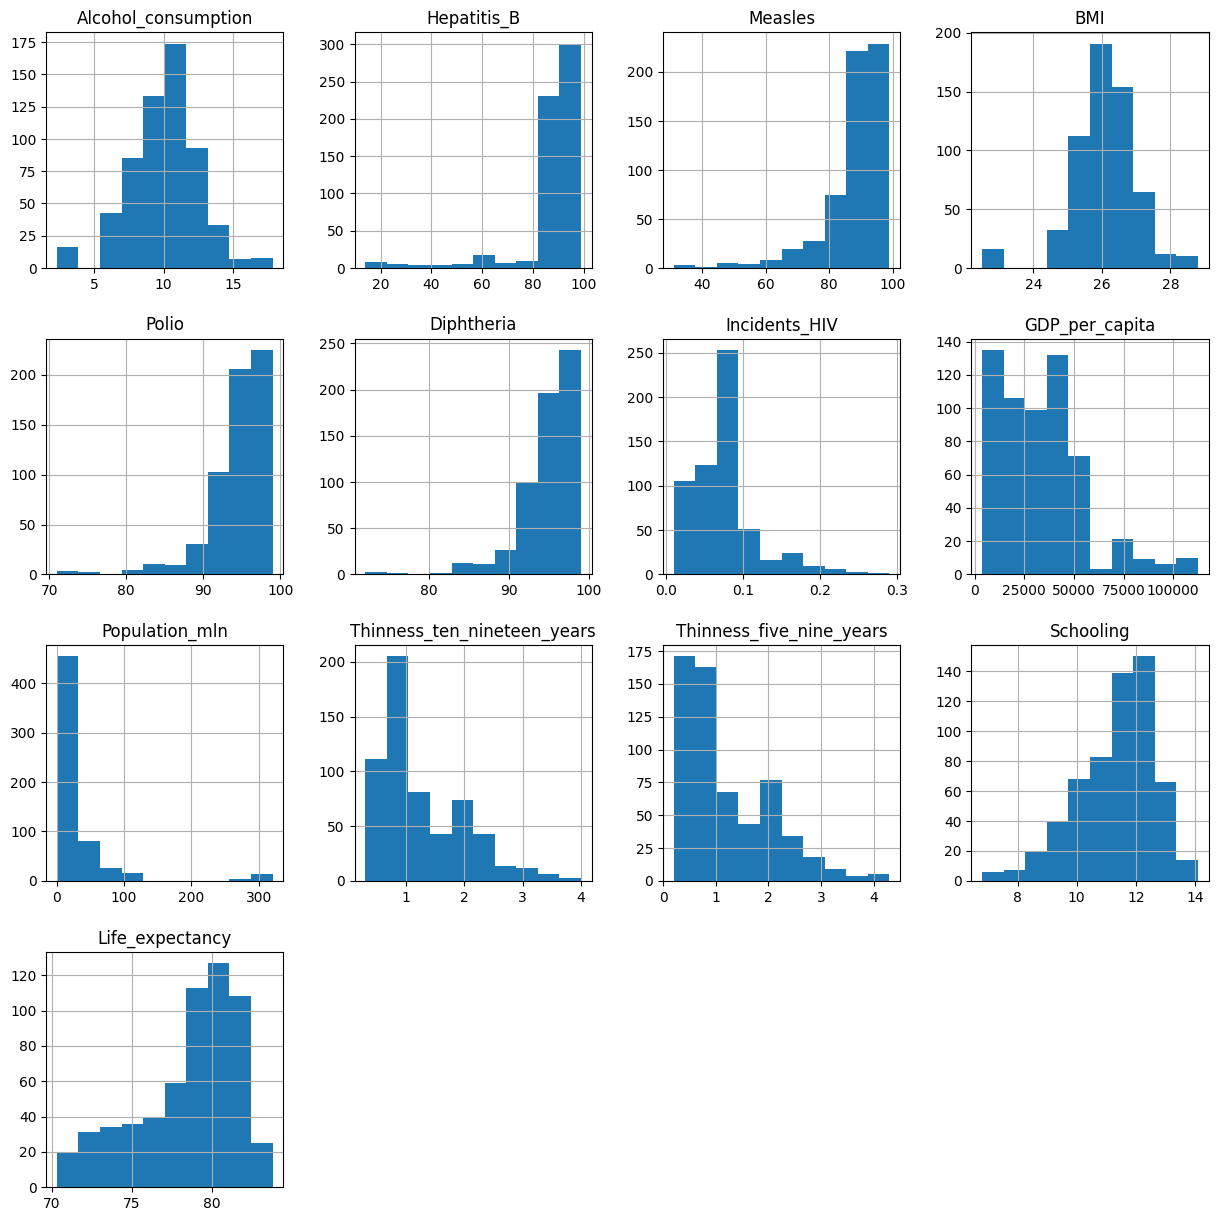

In [267]:
df_developed.hist(bins=10, figsize=(15,15))

array([[<Axes: title={'center': 'Alcohol_consumption'}>,
        <Axes: title={'center': 'Hepatitis_B'}>,
        <Axes: title={'center': 'Measles'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'Incidents_HIV'}>,
        <Axes: title={'center': 'GDP_per_capita'}>],
       [<Axes: title={'center': 'Population_mln'}>,
        <Axes: title={'center': 'Thinness_ten_nineteen_years'}>,
        <Axes: title={'center': 'Thinness_five_nine_years'}>,
        <Axes: title={'center': 'Schooling'}>],
       [<Axes: title={'center': 'Life_expectancy'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

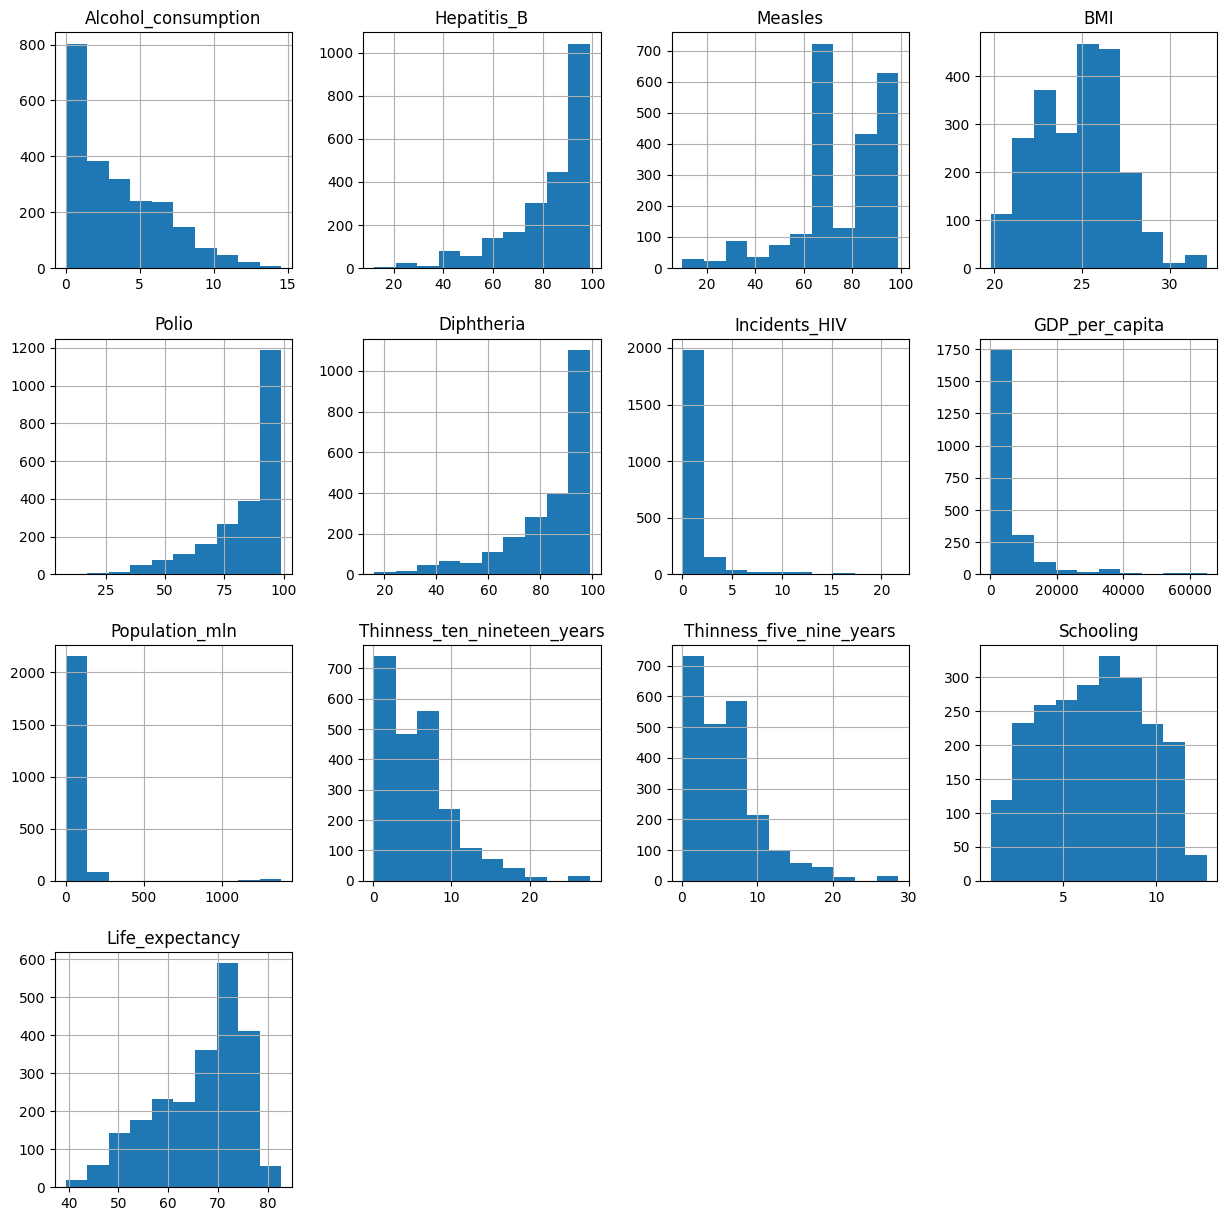

In [268]:
df_developing.hist(bins=10, figsize=(15,15))

### 2. Analyze the correlations of each dataset

<Axes: >

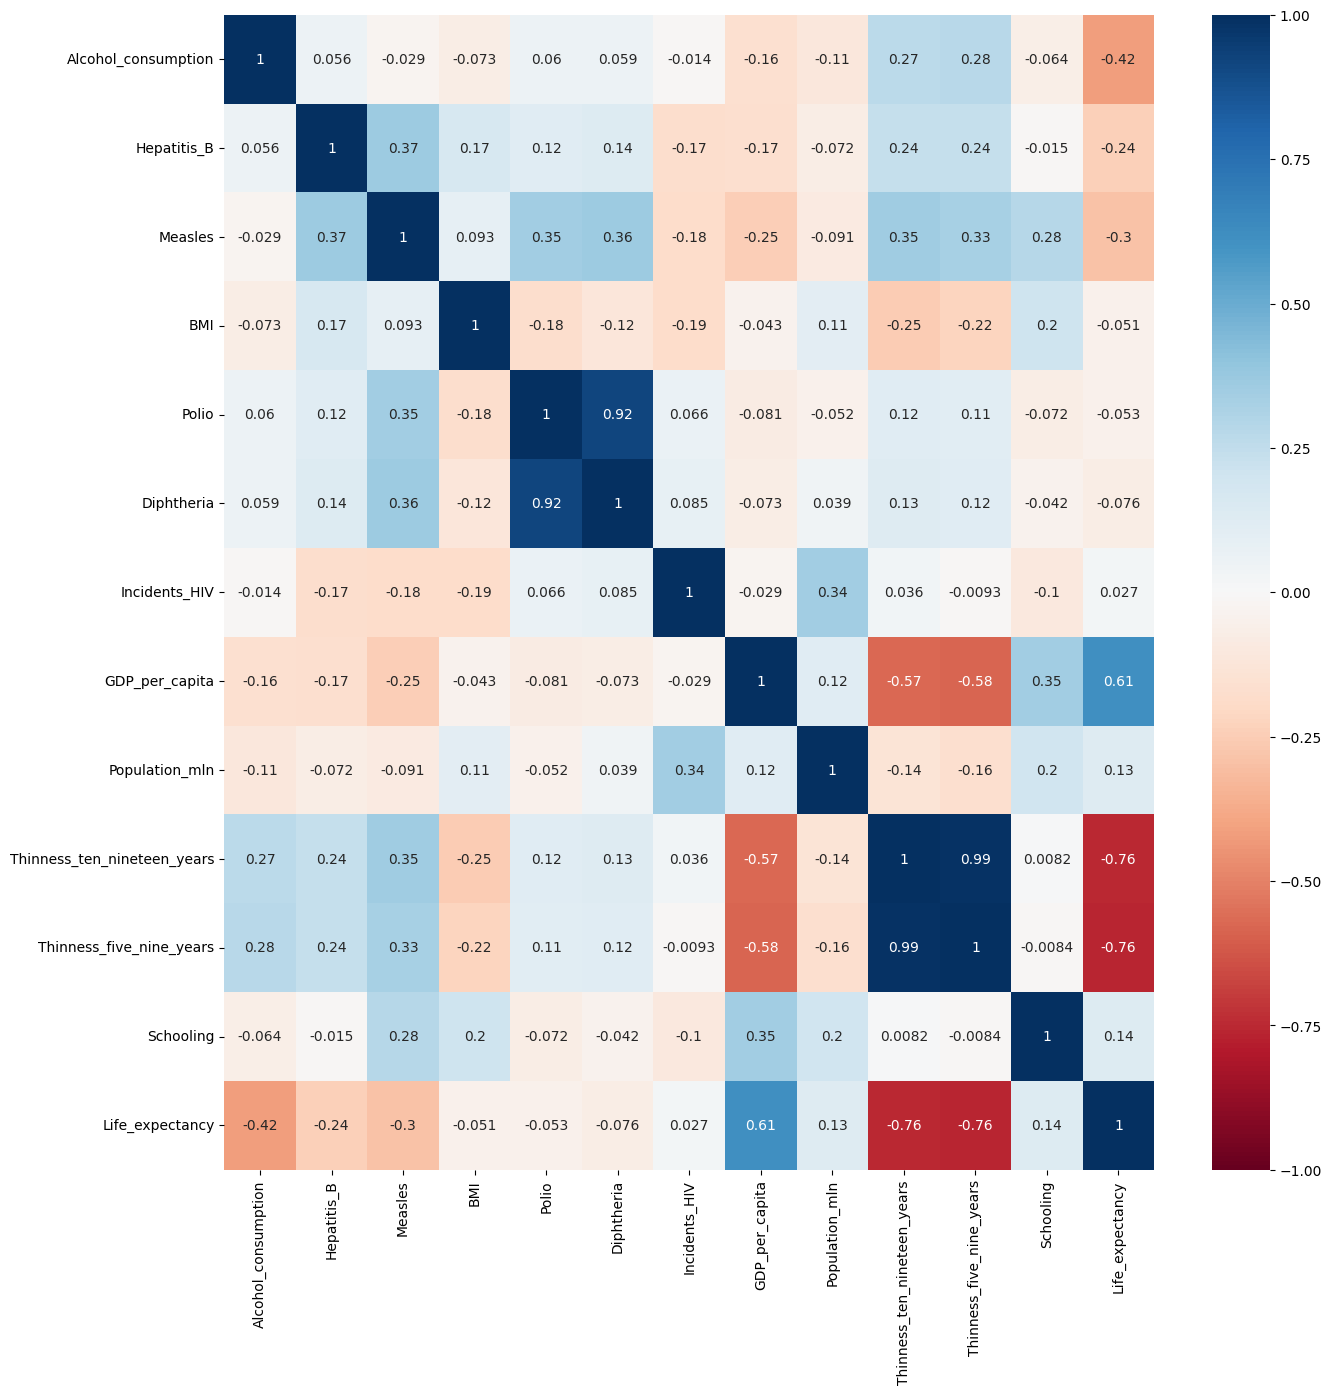

In [269]:
corr_matrix_developed = df_developed.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix_developed,vmin=-1.0,vmax=1.0, cmap='RdBu', annot=True)

<Axes: >

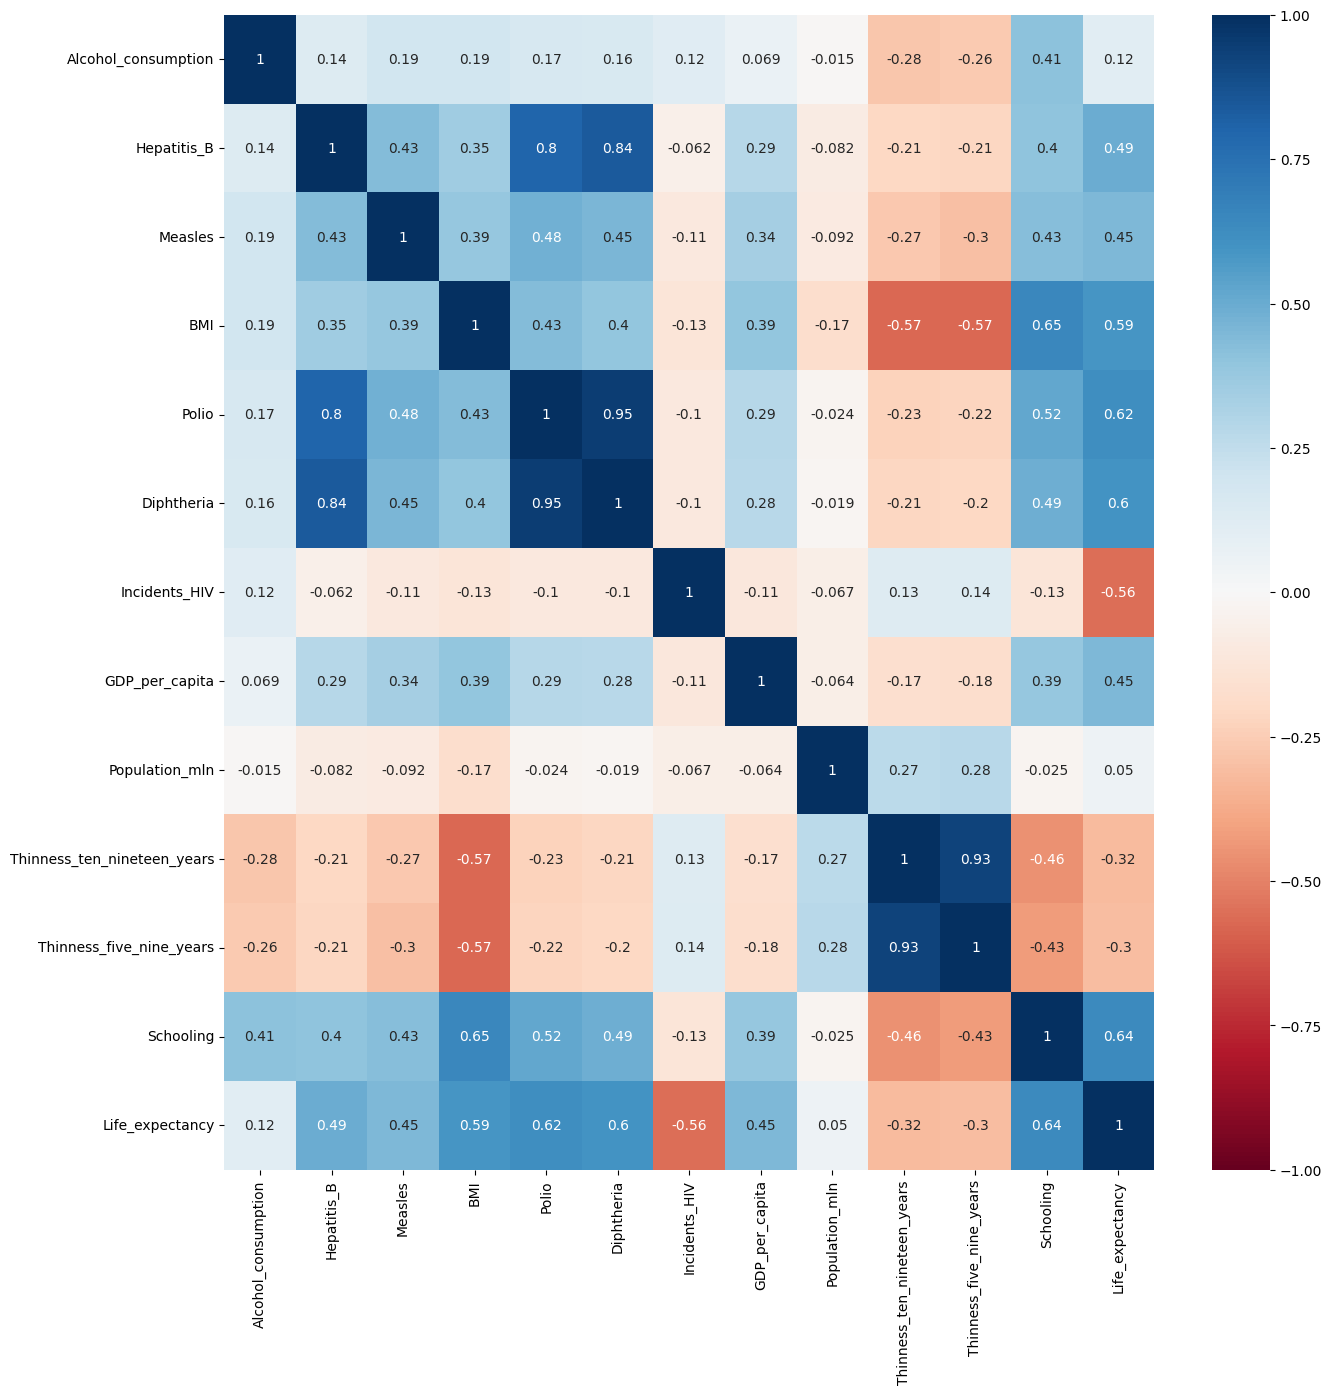

In [270]:
corr_matrix_developing = df_developing.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix_developing,vmin=-1.0,vmax=1.0, cmap='RdBu', annot=True)

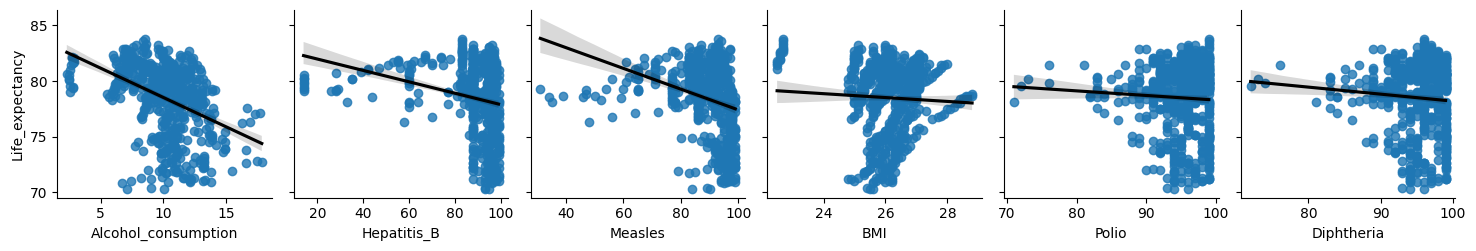

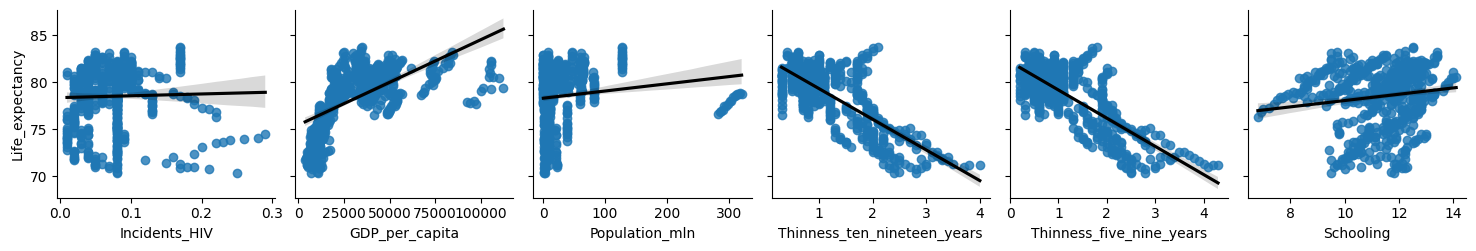

In [271]:
sns.pairplot(df_developed, x_vars = df_developed.iloc[:, 0:6], y_vars = df_developed.iloc[:, 12:13], kind = 'reg', plot_kws={'line_kws':{'color':'black'}})
sns.pairplot(df_developed, x_vars = df_developed.iloc[:,6:12] , y_vars = df_developed.iloc[:, 12:13], kind = 'reg', plot_kws={'line_kws':{'color':'black'}})
plt.show()

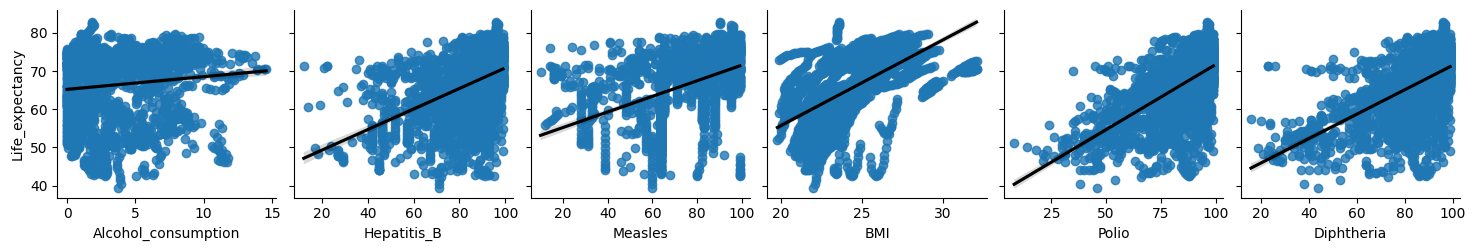

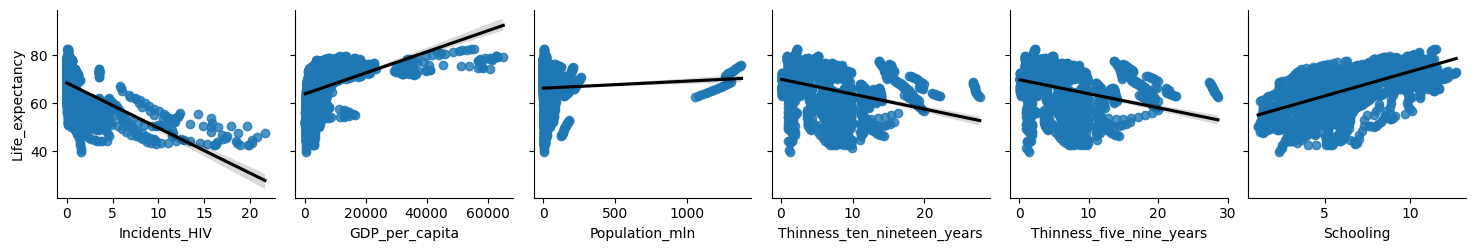

In [272]:
sns.pairplot(df_developing, x_vars = df_developing.iloc[:, 0:6], y_vars = df_developing.iloc[:, 12:13], kind = 'reg', plot_kws={'line_kws':{'color':'black'}})
sns.pairplot(df_developing, x_vars = df_developing.iloc[:,6:12] , y_vars = df_developing.iloc[:, 12:13], kind = 'reg', plot_kws={'line_kws':{'color':'black'}})
plt.show()

- The correlations between attributes differ greatly when comparing the developing countries and the developed countries
- To increase the accuracy of the linear model, the model is done separately to both datasets

### 3. Select the independent variables and the dependant variable
The model is done for the developing countries dataset. To create a model for the developed countries, change the source dataframe from df_developing to df_developed.

In [273]:

X = df_developing.iloc[:,0:12]
Y = df_developing.iloc[:,12:13]
print(X)

      Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  Diphtheria  \
0                   1.320         97.0     65.0  27.8   97.0        97.0   
2                   1.570         60.0     35.0  21.2   67.0        64.0   
3                   5.680         93.0     74.0  25.3   92.0        93.0   
5                   4.190         88.0     86.0  26.4   89.0        89.0   
6                   8.060         97.0     97.0  26.2   97.0        97.0   
...                   ...          ...      ...   ...    ...         ...   
2857               12.920         70.0     92.0  25.7   99.0        99.0   
2858                0.023         97.0     65.0  25.6   98.0        99.0   
2859                0.092         72.0     64.0  20.8   41.0        34.0   
2860                6.560         97.0     97.0  25.3   96.0        95.0   
2861                1.560         62.0     95.0  21.9   97.0        97.0   

      Incidents_HIV  GDP_per_capita  Population_mln  \
0              0.08         1100

In [274]:
print(Y)

      Life_expectancy
0                76.5
2                65.4
3                67.0
5                78.2
6                71.2
...               ...
2857             68.9
2858             72.6
2859             49.9
2860             66.9
2861             74.3

[2272 rows x 1 columns]


In [275]:
#divide the data to the test set and train set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print('The shape of the training data:')
print(X_train.shape)
print(y_train.shape)
print('The shape of the test data:')
print(X_test.shape)
print(y_test.shape)

The shape of the training data:
(1817, 12)
(1817, 1)
The shape of the test data:
(455, 12)
(455, 1)


In [276]:
print(y_test)

      Life_expectancy
231              72.9
2268             70.2
2679             72.7
1368             75.2
1748             65.0
...               ...
1315             78.4
1121             73.8
2112             70.5
12               72.3
1929             71.7

[455 rows x 1 columns]


## 4. Create and test the model

In [277]:
#fit the training sample into the linear regression model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [[-5.81261701e-02 -5.80978816e-03  2.37434556e-02  8.98133299e-01
   1.17833533e-01  6.38406983e-02 -1.51717875e+00  1.29236217e-04
   3.59884244e-03 -1.36150744e-01  2.83506329e-01  7.17276649e-01]]
Intercept: [22.87816013]


In [278]:
#calculate predictions
y_pred= pd.DataFrame(reg.predict(X_test))
y_pred['index'] = X_test.index
y_pred.set_index('index', inplace=True, drop=True)
print(y_pred)

               0
index           
231    69.930245
2268   66.696347
2679   73.612130
1368   71.413632
1748   62.252271
...          ...
1315   70.154242
1121   77.077717
2112   72.078577
12     77.936026
1929   73.823642

[455 rows x 1 columns]


In [279]:
#check the accuracy of the model with the test data
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred) 
print("MSE = ", mse)
print("R2s = ", r2score)

MSE =  16.710151468353306
R2s =  0.7922583646352055


- The high MSE value indicates that the predictability of the model is relatively low
- However, the R2s value is close to 1 which indicates that the dependant variable is highly affected by the independent variables

In [280]:
#calculate residuals
residuals = pd.DataFrame(data = y_test)['Life_expectancy']-y_pred[0]
print(residuals)

231     2.969755
2268    3.503653
2679   -0.912130
1368    3.786368
1748    2.747729
          ...   
1315    8.245758
1121   -3.277717
2112   -1.578577
12     -5.636026
1929   -2.123642
Length: 455, dtype: float64


In [281]:
df2_developing = pd.concat([y_test, y_pred, residuals], axis=1)
df2_developing.columns=['observed','predicted','residual']
print(df2_developing)

      observed  predicted  residual
231       72.9  69.930245  2.969755
2268      70.2  66.696347  3.503653
2679      72.7  73.612130 -0.912130
1368      75.2  71.413632  3.786368
1748      65.0  62.252271  2.747729
...        ...        ...       ...
1315      78.4  70.154242  8.245758
1121      73.8  77.077717 -3.277717
2112      70.5  72.078577 -1.578577
12        72.3  77.936026 -5.636026
1929      71.7  73.823642 -2.123642

[455 rows x 3 columns]


<Figure size 640x480 with 0 Axes>

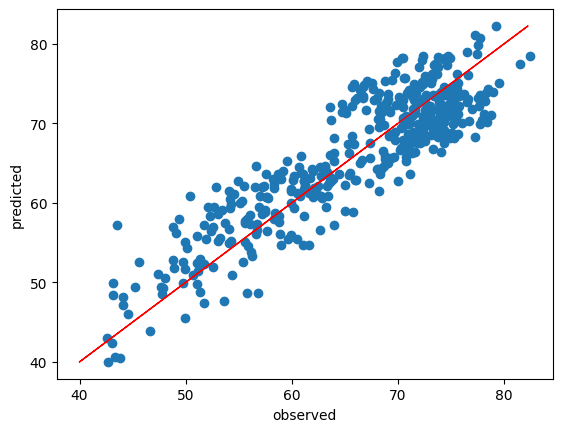

In [282]:
#check the distribution of the predicted and observed values, as well as residuals
plt.figure()
df2_developing.plot.scatter(x='observed', y='predicted')
plt.scatter(x=pd.DataFrame(data = y_test)['Life_expectancy'], y=y_pred[0])
plt.plot(y_pred[0],y_pred[0], color='red', linewidth=1)
plt.show()

<Figure size 640x480 with 0 Axes>

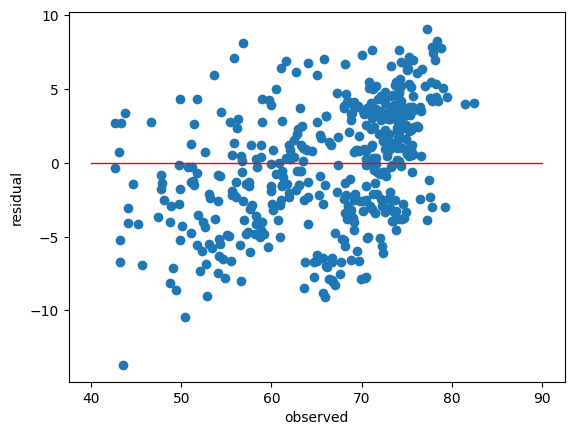

In [283]:
plt.figure()
df2_developing.plot.scatter(x='observed', y='residual')
plt.scatter(x=pd.DataFrame(data = y_test)['Life_expectancy'], y=residuals)
plt.plot([40,90], [0,0], color='red', linewidth=1)
plt.show()

- Observed and predicted values follow a rising linear pattern
- Residuals are equally distributed

In [296]:
#create and test the model with standardized values
scaler = StandardScaler()
dfscaled = pd.DataFrame(scaler.fit_transform(df_developed))
dfscaled.columns=df_developed.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12]] #how to select columns between 0-12? listed them each individually
print(dfscaled)

     Alcohol_consumption  Hepatitis_B   Measles       BMI     Polio  \
0               0.120459     0.630345  0.571628 -0.084532  0.530833   
1              -2.868570     0.630345  0.073536  0.993983 -0.215611   
2               0.873727     0.010356  1.069720 -0.192384  1.028462   
3              -1.033482    -0.402969 -1.121885  1.101834 -4.694277   
4               0.076385     0.010356 -1.719595 -1.163047 -0.215611   
..                   ...          ...       ...       ...       ...   
587             0.020291     0.630345 -0.524175 -0.192384  0.779648   
588            -0.444491     0.010356  0.372391 -0.300235  0.033203   
589            -0.660855    -0.334082  0.571628 -3.643632  1.028462   
590             0.380898     0.423682  0.671246  0.023319  0.530833   
591            -1.285907     0.010356  0.173154  0.023319  0.033203   

     Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0      0.503227       0.343573       -0.372782        0.360332   
1     -0.282126

In [300]:
Xscaled = dfscaled.iloc[:,0:12]
Yscaled = dfscaled.iloc[:,12:13]

In [301]:
reg2 = linear_model.LinearRegression()
reg2.fit(Xscaled,Yscaled)
print("Result out of standardized variables:")
print("Coefficients:" ,reg2.coef_)
print("Intercept:", reg2.intercept_)

Result out of standardized variables:
Coefficients: [[-0.23310643  0.03310061 -0.08257551 -0.26518664  0.07261979 -0.03132442
   0.0207779   0.09821804 -0.01453577 -0.82843381  0.13803271  0.18488246]]
Intercept: [2.65951408e-15]


- With standardized values, the Thinness_five_nine_years has the strongest negative correlation to the life expectancy.

## Conclusion
The key findings of the analysis:
- The correlations between life expectancy and independent predicting factors differ when comparing developing nations to developed (correlation visualizations).
- Multiple linear regression model is not the most optimal tool for creating accurate life expectancy predictions from the dataset (MSE value low).
- However, the correlation between the independent and dependant variables is linear and positive (high R2s value and the distributions of observations and residuals).
